# Model-Based Control (SVG)

In [1]:
import os
import os.path
import numpy as np
import pandas as pd
import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Matplotlib setup

Latex presets ([ref](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

In [2]:
from functools import partial

plot.create_latex_style()
set_size = partial(plot.latex_size, width="thesis")

In [3]:
print(*plot.available_styles())

Solarize_Light2 _classic_test_patch bmh classic dark_background fast fivethirtyeight ggplot grayscale seaborn seaborn-bright seaborn-colorblind seaborn-dark seaborn-dark-palette seaborn-darkgrid seaborn-deep seaborn-muted seaborn-notebook seaborn-paper seaborn-pastel seaborn-poster seaborn-talk seaborn-ticks seaborn-white seaborn-whitegrid tableau-colorblind10 tex


In [4]:
print(f"Your style sheets are located at: {plot.STYLE_PATH}")

Your style sheets are located at: /Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib


In [5]:
# Using seaborn's style
# plt.style.use("seaborn")
sns.set()
# With LaTex fonts
plt.style.use("tex")

In [6]:
def figpath(name: str) -> str:
    return os.path.join("images", name + ".pdf")


def savefig(fig, name):
    return plot.save_pdf_tight(fig, figpath(name))

In [7]:
def latex_friendly_fields_(dataframe: pd.DataFrame):
    manual = {
        "Iteration": "training_iteration",
        "seed": "config/seed",
        "dim(S)": "config/env_config/n_state",
        "dim(A)": "config/env_config/n_ctrl",
        "Grad accuracy": "grad_acc",
        "strategy": "config/strategy",
    }
    for new, old in manual.items():
        if old in dataframe:
            dataframe[new] = dataframe[old]

    for col in dataframe.columns:
        if "summary" in col:
            continue
        col_ = (
            col.replace("config", "").replace("/", " ").replace("_", " ").capitalize()
        )
        dataframe[col_] = dataframe[col]

## Policy gradient ascent with perfect gradients

In [8]:
PERFECT_GRADS = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"perfect_grad": True},
    tags="ModelBasedControl 10.3.0".split(),
)
latex_friendly_fields_(PERFECT_GRADS)
PERFECT_GRADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10088 entries, 0 to 10087
Columns: 124 entries, collect/episode_return_max to Dim(a)
dtypes: bool(4), float64(51), int64(57), object(12)
memory usage: 9.3+ MB


/var/folders/pj/tpywc3yj6y17s6f964hc7d6c0000gn/T/ipykernel_79620/1641145934.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col_] = dataframe[col]


In [9]:
PERFECT_GRADS["seed"].unique()

array([784, 783, 782, 781, 780])

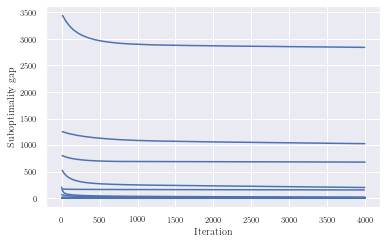

In [10]:
fig = plt.figure(figsize=set_size())
ax = sns.lineplot(
    data=PERFECT_GRADS,
    x="Iteration",
    y="Suboptimality gap",
    units="config/experiment_id",
    estimator=None,
)
plt.show()

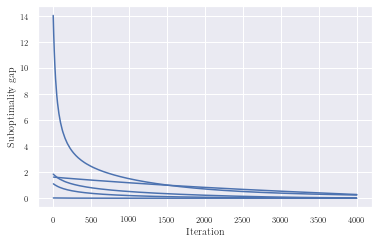

In [11]:
fig = plt.figure(figsize=set_size())
ax = sns.lineplot(
    data=PERFECT_GRADS.query(
        "`config/env_config/n_state` == `config/env_config/n_ctrl` == 2"
    ),
    x="Iteration",
    y="Suboptimality gap",
    units="config/experiment_id",
    estimator=None,
)
plt.show()

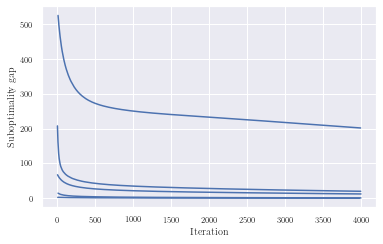

In [12]:
fig = plt.figure(figsize=set_size())
ax = sns.lineplot(
    data=PERFECT_GRADS.query(
        "`config/env_config/n_state` == `config/env_config/n_ctrl` == 8"
    ),
    x="Iteration",
    y="Suboptimality gap",
    units="config/experiment_id",
    estimator=None,
)
plt.show()

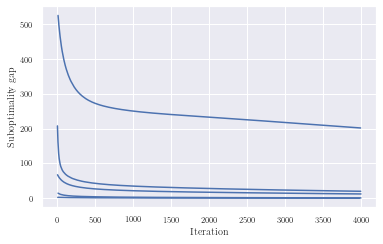

In [13]:
fig = plt.figure(figsize=set_size())
ax = sns.lineplot(
    data=PERFECT_GRADS.query(
        "`config/env_config/n_state` == `config/env_config/n_ctrl` == 8"
    ),
    x="Iteration",
    y="Suboptimality gap",
    units="config/experiment_id",
    estimator=None,
)
plt.show()

In [15]:
# sns.reset_orig()
# sns.set()
# fgrid = sns.relplot(
#     data=PERFECT_GRADS,
#     kind="line",
#     x="Iteration",
#     y="Suboptimality gap",
#     row="dim(S)",
#     col="dim(A)",
# )
# plt.show()

## SVG with perfect models using the MAAC($K$) estimator

**default system**
dim$(\mathcal{S})$ = dim$(\mathcal{A})$ = 2

In [16]:
PERFECT_MODEL = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"perfect_grad": False, "model.perfect_model": True},
    tags="ModelBasedControl SVG ".split(),
)
latex_friendly_fields_(PERFECT_MODEL)

/var/folders/pj/tpywc3yj6y17s6f964hc7d6c0000gn/T/ipykernel_79620/1641145934.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col_] = dataframe[col]


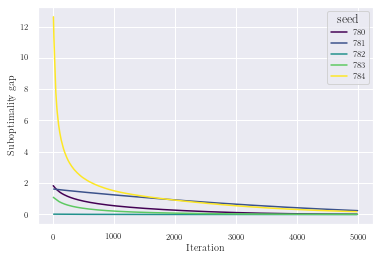

In [17]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == `dim(A)`"),
    x="Iteration",
    y="Suboptimality gap",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

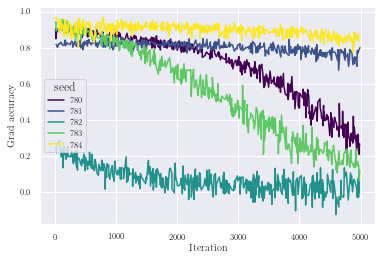

In [18]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == `dim(A)`"),
    x="Iteration",
    y="Grad accuracy",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

**underactuated system** dim$(\mathcal{S}) = 8$, dim$(\mathcal{A}) = 2$

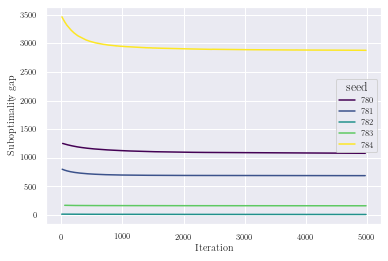

In [19]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == 8 & `dim(A)` == 2"),
    x="Iteration",
    y="Suboptimality gap",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

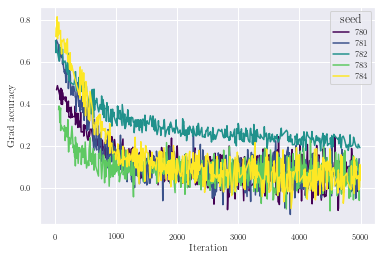

In [20]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == 8 & `dim(A)` == 2"),
    x="Iteration",
    y="Grad accuracy",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

**overactuated system** dim$(\mathcal{S}) = 2$, dim$(\mathcal{A}) = 8$

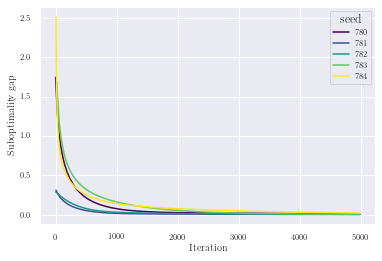

In [21]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == 2 & `dim(A)` == 8"),
    x="Iteration",
    y="Suboptimality gap",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

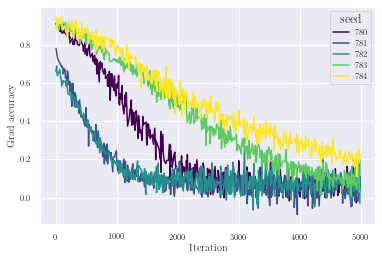

In [22]:
sns.lineplot(
    data=PERFECT_MODEL.query("`dim(S)` == 2 & `dim(A)` == 8"),
    x="Iteration",
    y="Grad accuracy",
    hue="seed",
    estimator=None,
    palette="viridis",
)
plt.show()

## Comparing model-based policy optimization strategies

### LQG dim = 2

In [23]:
FULL_2 = pd.concat(
    [
        wandb_runs_dataframe(
            "angelovtt/ch5",
            configs={"exploration.type": "gaussian"},
            tags="ModelBasedControl 11.2.0".split(),
        ),
        wandb_runs_dataframe(
            "angelovtt/ch5",
            configs={"exploration.type": "gaussian"},
            tags="ModelBasedControl 11.4.0".split(),
        ),
    ],
    ignore_index=True,
)
latex_friendly_fields_(FULL_2)
FULL_2.head()

/var/folders/pj/tpywc3yj6y17s6f964hc7d6c0000gn/T/ipykernel_79620/1641145934.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col_] = dataframe[col]


,reward/obs_grad_acc,collect/episode_return_max,time_this_iter_s,collect/episode_logp_mean,collect/obs_mean,policy/optimal_value,reward/epochs,_step,timesteps_total,collect/act_std,...,model reward dm val batch size,model reward dm train batch size,model dynamics dm seq len,model dynamics dm val batch size,model dynamics dm train batch size,model qvalue model type,Seed,Dim(s),Dim(a),Strategy
0,0.706932,-203.212845,39.021383,-284.932068,16.683315,-46.630749,40,0,2000,0.890352,...,64,64,8,128,128,quad,799,2,2,maac
1,0.977134,-203.212845,38.809185,-284.847229,16.673994,-46.630749,40,1,2100,0.890031,...,64,64,8,128,128,quad,799,2,2,maac
2,0.992627,-203.212845,42.856351,-284.942017,16.678547,-46.630749,40,2,2200,0.889140,...,64,64,8,128,128,quad,799,2,2,maac
3,0.999080,-203.212845,47.434856,-284.754425,16.673460,-46.630749,39,3,2300,0.886527,...,64,64,8,128,128,quad,799,2,2,maac
4,0.999958,-203.212845,37.312218,-285.440216,16.666521,-46.630749,8,4,2400,0.884682,...,64,64,8,128,128,quad,799,2,2,maac


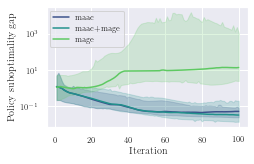

In [39]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_2,
    x="Iteration",
    y="Policy suboptimality gap",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.set(yscale="log")
ax.legend(bbox_to_anchor=(.4, 1))
savefig(fig, "control_sub_optimality_dim2")

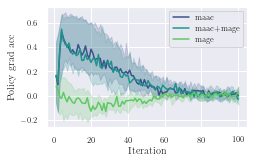

In [25]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_2,
    x="Iteration",
    y="Policy grad acc",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.legend()
savefig(fig, "control_grad_acc_dim2")

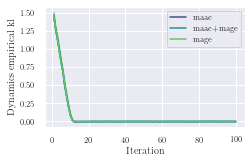

In [26]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_2,
    x="Iteration",
    y="Dynamics empirical kl",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.legend()
savefig(fig, "control_dynamics_kl_dim2")

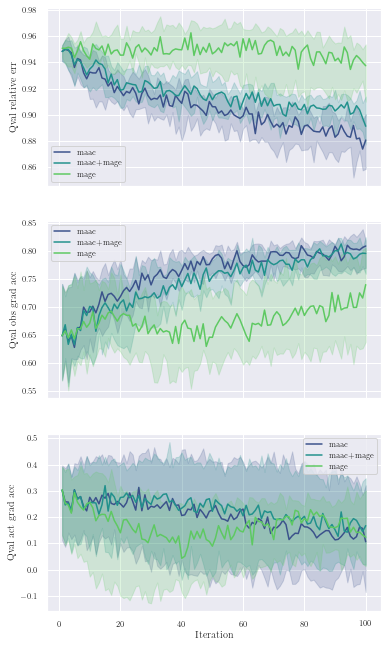

In [27]:
fig, axis = plt.subplots(3, sharex=True, figsize=set_size(subplots=(3, 1)))

for ax, col in zip(
    axis, ["Qval relative err", "Qval obs grad acc", "Qval act grad acc"]
):
    sns.lineplot(
        data=FULL_2,
        ax=ax,
        x="Iteration",
        y=col,
        hue="strategy",
        estimator=np.median,
        palette="viridis",
    )
    ax.legend()
savefig(fig, "control_qval_stats_dim2")

### LQG dim = 4

In [28]:
FULL_4 = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"exploration.type": "gaussian", "env_config.n_state": 4},
    tags="ModelBasedControl 11.6.0".split(),
)
latex_friendly_fields_(FULL_4)

/var/folders/pj/tpywc3yj6y17s6f964hc7d6c0000gn/T/ipykernel_79620/1641145934.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col_] = dataframe[col]


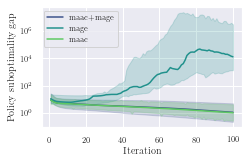

In [40]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_4,
    x="Iteration",
    y="Policy suboptimality gap",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.set(yscale="log")
ax.legend(bbox_to_anchor=(.4, 1))
savefig(fig, "control_suboptimality_dim4")

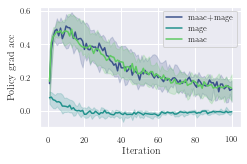

In [30]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_4,
    x="Iteration",
    y="Policy grad acc",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.legend()
savefig(fig, "control_grad_acc_dim4")

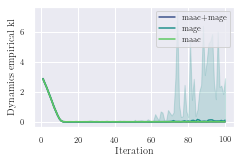

In [31]:
fig = plt.figure(figsize=set_size(fraction=0.6))
ax = sns.lineplot(
    data=FULL_4,
    x="Iteration",
    y="Dynamics empirical kl",
    hue="strategy",
    estimator=np.median,
    palette="viridis",
)
ax.legend()
savefig(fig, "control_dynamics_kl_dim4")

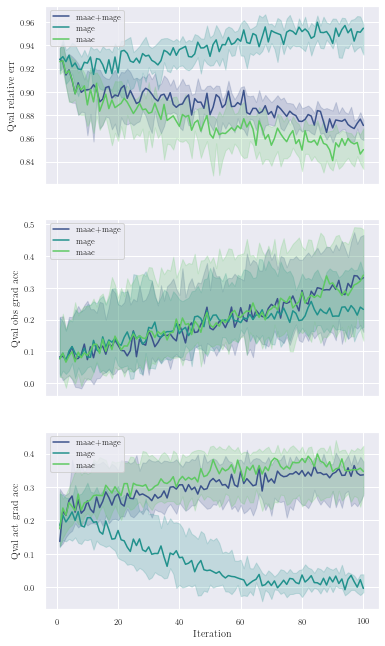

In [43]:
fig, axis = plt.subplots(3, sharex=True, figsize=set_size(subplots=(3, 1)))

for ax, col in zip(
    axis, ["Qval relative err", "Qval obs grad acc", "Qval act grad acc"]
):
    sns.lineplot(
        data=FULL_4,
        ax=ax,
        x="Iteration",
        y=col,
        hue="strategy",
        estimator=np.median,
        palette="viridis",
    )
    ax.legend(bbox_to_anchor=(.25, 1))
savefig(fig, "control_qval_stats_dim4")